In [1]:
import Ipynb_importer
from PIL import Image
import json
import torch
from torchvision import transforms
from model import getVGG
import matplotlib.pyplot as plt
%matplotlib inline

importing Jupyter notebook from model.ipynb


In [2]:
# 用Compose串联多个数据增强操作
data_transform = transforms.Compose([
    transforms.Resize((224, 224)),# cannot 224, must (224, 224)
    transforms.ToTensor(),
    # 标准化：再使用公式"(x-mean)/std"，将每个元素分布到(-1,1)
    transforms.Normalize((0.5, 0.5, 0.5),(0.5, 0.5, 0.5)),
])

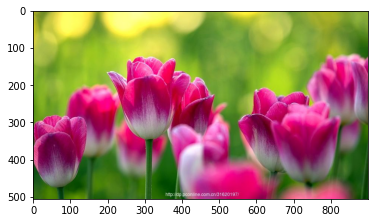

In [3]:
# 加载图片
img_path = "./data/tulip_demo.jpeg"
img = Image.open(img_path)
plt.imshow(img)

In [4]:
img = data_transform(img) # [C, H, W]
# torch.unsqueeze详解:https://blog.csdn.net/xiexu911/article/details/80820028
img = torch.unsqueeze(img, dim=0) # [B, C, H, W]

In [5]:
# 获取lable
try:
    with open("./class_indices.json") as json_file:
        class_indices = json.load(json_file)
except Exception as e:
    print(e)
    exit(-1)

In [6]:
# 实例化模型
model = getVGG(num_classes=5)
# 加载模型参数
model_weight_path = "./myVGG.pth"
model.load_state_dict(torch.load(model_weight_path))

<All keys matched successfully>

In [7]:
# 开始预测
model.eval()
with torch.no_grad():
    # torch.squeeze详解:https://blog.csdn.net/xiexu911/article/details/80820028
    output = torch.squeeze(model(img)) #压缩掉Batch维度
    predict = torch.softmax(output, dim=0) #将置信度转为[0-1]范围
    predict_class_index = torch.argmax(predict).numpy()

print(f"[预测类别]:{class_indices[str(predict_class_index)]}\t[置信度]:{predict[predict_class_index].item()}")

[预测类别]:tulip	[置信度]:0.9922516942024231
